In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from nbodykit.lab import LinearMesh, cosmology
from nbodykit.lab import ArrayMesh
from nbodykit.lab import FFTPower
from nbodykit.source import catalog

In [83]:
import h5py

In [81]:
paths[0]

'/work/06147/pberger/stampede2/gadget_runs/cosmo1/n512_512Mpc_cosmo1_seed1/outputs/n512_512Mpc_cosmo1_seed1_010'

In [ ]:
base_path = "/work/06147/pberger/stampede2/gadget_runs/cosmo1/"

for sim_path in paths:
    
    gcat = catalog.Gadget1Catalog(sim_path)
    gmesh = gcat.to_mesh(512, BoxSize=512.0*0.695, compensated=True)
    gma = gmesh.preview()
    
    sim_name = sim_path.split('/')[-1].split('_')[-2]
    print(sim_name)
    
    # Save
    with h5py.File(base_path + 'n512_512Mpc_cosmo1_z0_gridpart.h5') as ofile:
        ofile.create_dataset(sim_name, data = np.array(gma))

seed1
seed2


In [8]:
ls $WORK/gadget_runs/cosmo1/n512_512Mpc_cosmo1_seed1/outputs/

n512_512Mpc_cosmo1_seed1_010


In [71]:
base_path = "/work/06147/pberger/stampede2/gadget_runs/cosmo1/"
name_base = "n512_512Mpc_cosmo1_seed"

base_paths = [base_path + name_base + str(i) + '/outputs/']
paths = [base_path + name_base + str(i) + '/outputs/' + name_base + str(i) + "_010" for i in range(1, 33)]

print(paths[0])

/work/06147/pberger/stampede2/gadget_runs/cosmo1/n512_512Mpc_cosmo1_seed1/outputs/n512_512Mpc_cosmo1_seed1_010


In [37]:
gcat = catalog.Gadget1Catalog(paths[0])

In [66]:
gmesh = gcat.to_mesh(512, BoxSize=512.0*0.695, compensated=True)

In [67]:
gma = gmesh.preview()

In [75]:
gma.tofile()

array([[[3.06271017e-01, 2.94254366e-02, 2.01058369e-02, ...,
         3.39841485e-01, 1.13675721e-01, 1.76572055e-01],
        [7.27676332e-01, 6.39693022e-01, 1.40942082e-01, ...,
         2.70518064e-01, 3.72616798e-01, 3.31714094e-01],
        [0.00000000e+00, 3.60276774e-02, 3.62856593e-03, ...,
         3.53401512e-01, 1.19512461e-01, 0.00000000e+00],
        ...,
        [7.01601850e-03, 0.00000000e+00, 0.00000000e+00, ...,
         2.74405569e-01, 1.16800601e-02, 2.64906250e-02],
        [2.31336403e+00, 2.77982783e-02, 0.00000000e+00, ...,
         0.00000000e+00, 2.47052863e-01, 8.31963360e-01],
        [6.37858391e-01, 9.78083815e-03, 0.00000000e+00, ...,
         3.42621505e-01, 1.81803256e-01, 9.47657451e-02]],

       [[9.99489665e-01, 5.22674806e-02, 9.67701674e-02, ...,
         3.49292569e-02, 3.64777558e-02, 1.95104867e-01],
        [1.33893991e+00, 3.03552836e-01, 4.81258303e-01, ...,
         9.14167017e-02, 1.49843410e-01, 2.85411865e-01],
        [0.00000000e+00, 

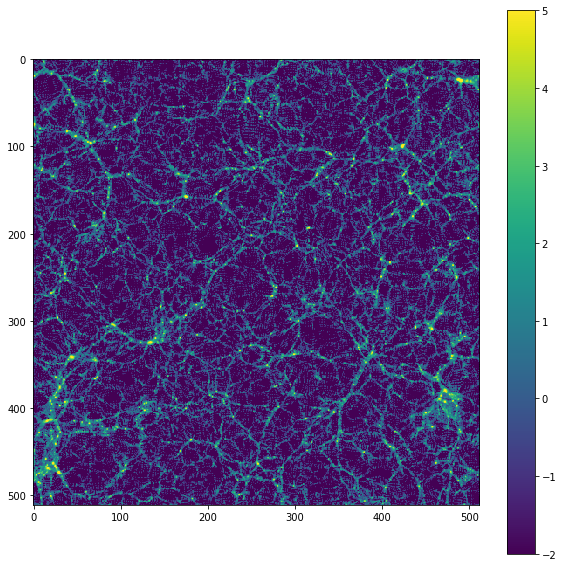

In [68]:
fig = figure(figsize = (10, 10))
imshow(np.log(1e-16 + gma[128]), vmin=-2, vmax=5)
colorbar()

In [69]:
pk = FFTPower(gmesh, mode='1d')

In [ ]:
#Get a linear P(k) from CLASS
#cosmo = cosmology.Cosmology(h=h, Omega0_b=omegab, Omega0_cdm=omegac, n_s=ns, m_ncdm = [], verbose=True)
#Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='CLASS')

#k = np.logspace(-3, 1.0, 100)
#loglog(k*h, 1.2**2*Plin(k)/h**3, c='C0')

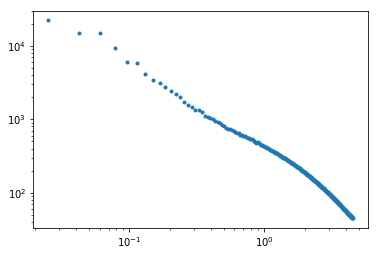

In [72]:
loglog(pk.power['k'][1:], abs(pk.power['power'][1:]), '.', c='C0')

#ylim(5e2, 5e5)